# IMPORTING LIBRARIES

Importing the necessary libraries for the project.|

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score as acc

# LOADING THE .DATA FILE INTO A DATAFRAME

In [2]:
#The file doesn't contain any headers
data = pd.read_csv('daatamain.csv',)

#Data Overview
data.head()

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Ozone Day
0,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,2.3,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,?,?,?,?,?,?,?,?,0.58,0


In [3]:
#Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2536 entries, 0 to 2535
Data columns (total 73 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   WSR0       2536 non-null   object
 1   WSR1       2536 non-null   object
 2   WSR2       2536 non-null   object
 3   WSR3       2536 non-null   object
 4   WSR4       2536 non-null   object
 5   WSR5       2536 non-null   object
 6   WSR6       2536 non-null   object
 7   WSR7       2536 non-null   object
 8   WSR8       2536 non-null   object
 9   WSR9       2536 non-null   object
 10  WSR10      2536 non-null   object
 11  WSR11      2536 non-null   object
 12  WSR12      2536 non-null   object
 13  WSR13      2536 non-null   object
 14  WSR14      2536 non-null   object
 15  WSR15      2536 non-null   object
 16  WSR16      2536 non-null   object
 17  WSR17      2536 non-null   object
 18  WSR18      2536 non-null   object
 19  WSR19      2536 non-null   object
 20  WSR20      2536 non-null   obj

# PREPROCESSING

In [4]:
#Removing missing values in the data represented by '?'
data = data.replace('?',np.nan).dropna(how='any',axis=0)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1848 entries, 0 to 2535
Data columns (total 73 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   WSR0       1848 non-null   object
 1   WSR1       1848 non-null   object
 2   WSR2       1848 non-null   object
 3   WSR3       1848 non-null   object
 4   WSR4       1848 non-null   object
 5   WSR5       1848 non-null   object
 6   WSR6       1848 non-null   object
 7   WSR7       1848 non-null   object
 8   WSR8       1848 non-null   object
 9   WSR9       1848 non-null   object
 10  WSR10      1848 non-null   object
 11  WSR11      1848 non-null   object
 12  WSR12      1848 non-null   object
 13  WSR13      1848 non-null   object
 14  WSR14      1848 non-null   object
 15  WSR15      1848 non-null   object
 16  WSR16      1848 non-null   object
 17  WSR17      1848 non-null   object
 18  WSR18      1848 non-null   object
 19  WSR19      1848 non-null   object
 20  WSR20      1848 non-null   obj

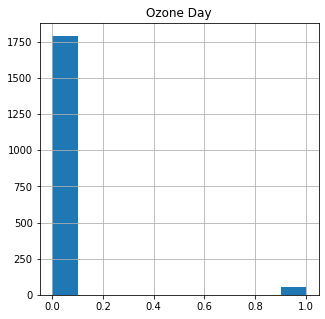

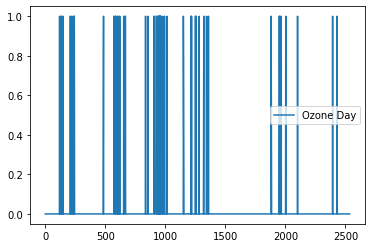

In [6]:
data.hist(figsize = (5,5))
data.plot()

# SPLITTING & SCALING THE DATA

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:72],data.iloc[:,72],test_size=0.3,random_state=42)

scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# K-Nearest Neighbors 

In [8]:
knn = KNeighborsClassifier(n_neighbors  = 5)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('K-Nearest Neighbors : KNeighborsClassifier')
print('Accuracy :',knn.score(X_test,y_test))
print('Prcision :',precision_score(y_test,pred,average='micro'))

K-Nearest Neighbors : KNeighborsClassifier
Accuracy : 0.9603603603603603
Prcision : 0.9603603603603603


# Support Vector Machine

In [9]:
svm = SVC(gamma=0.001).fit(X_train,y_train)
pred = svm.predict(X_test)
print('Support Vector Machine : SVC')
print('Accuracy :',svm.score(X_test,y_test))
print('Prcision :',precision_score(y_test,pred,average='micro'))

Support Vector Machine : SVC
Accuracy : 0.9693693693693693
Prcision : 0.9693693693693693


# Random Forest

In [10]:
rnd = RandomForestClassifier(n_estimators=20).fit(X_train,y_train)
pred = knn.predict(X_test)
print('Random Forest : RandomForestClassifier')
print('Accuracy :',rnd.score(X_test,y_test))
print('Prcision :',precision_score(y_test,pred,average='micro'))

Random Forest : RandomForestClassifier
Accuracy : 0.9693693693693693
Prcision : 0.9603603603603603
